In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sym

In [50]:
# initial condition
t0 = 0.0
tn = 10.0  

# define the function and the initial guess
f = lambda t, s: np.exp(-t) # ODE
f0 = -1
diff_f = lambda t: -np.exp(-t)

def euler(f, h, t0, tn, f0, s):
    # approximiate the result using euler method
    s.append(f0)
    i = t0
    while i < tn:
        last_element = len(s) - 1
        s.append(s[last_element] + h * f(i, s[last_element]))
        i += h
        pass
    return s

def exact(func, h, t0, tn, s):
    s.append(f0)
    # calculte the target result
    i = t0
    while i < tn:
        s.append(func(i))
        i += h
        pass
    return s

def mse(list1, list2):
    # calculate the root mean square error between two lists
    return np.sqrt((np.subtract(list1, list2) ** 2).mean())


In [51]:
# the collection of errors w.r.t the number of test elements
error_list = []
nofelements = []

for n in range(1, 100, 1):
    h = (tn - t0) / n
    # print(h)
    
    # list of results by euler method and true function
    tmp = []
    approximations = euler(f, h, t0, tn, f0, tmp)
    tmp = []
    targets = exact(diff_f, h, t0, tn, tmp)
    # print(targets)
    
    # save all results with increased number of elements
    error_list.append(mse(approximations, targets))
    nofelements.append(n)
    
    # clean the collected results
    approximations = []
    targets = []
    pass

print(error_list)

[7.0710678118654755, 3.7114712201240607, 2.4156495641028806, 1.7552958712032967, 1.3654863193077824, 1.111931220794012, 0.9352703078473884, 0.8057633676958808, 0.7026019758655434, 0.6294841938323938, 0.563702496491789, 0.5156423267102968, 0.47271020978879, 0.4340867098955931, 0.40308658256417707, 0.3779515695137683, 0.352635325665058, 0.33184102172982194, 0.31464887632754057, 0.29798590134462344, 0.28299030671747494, 0.2684302378500464, 0.25709492513572113, 0.24583981491891835, 0.23552528763070213, 0.22603853687712597, 0.2166036354083891, 0.20854483161373644, 0.20165788329885187, 0.19465622086494022, 0.1875985432297902, 0.18201361148996478, 0.17582131971735426, 0.17090988401419444, 0.16585004966099612, 0.16108065362516488, 0.15620252780245786, 0.15231873028649728, 0.14794620966076388, 0.14445946556217273, 0.14082589360261943, 0.13707631717162758, 0.1340801651344732, 0.13067479152636502, 0.12769291370890284, 0.125090771127437, 0.12235602407631672, 0.11973816868613196, 0.1170114212066987

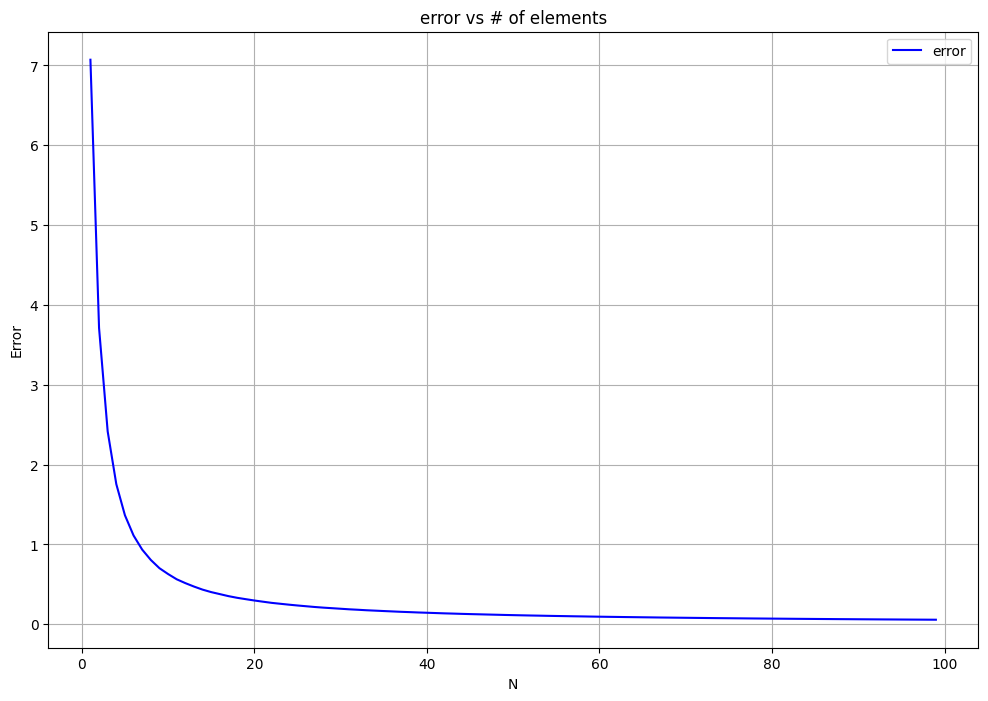

In [52]:
plt.figure(figsize = (12, 8))
plt.plot(nofelements, error_list, 'b', label='error')
plt.title('error vs # of elements')
plt.xlabel('N')
plt.ylabel('Error')
plt.grid()
plt.legend()
plt.show()

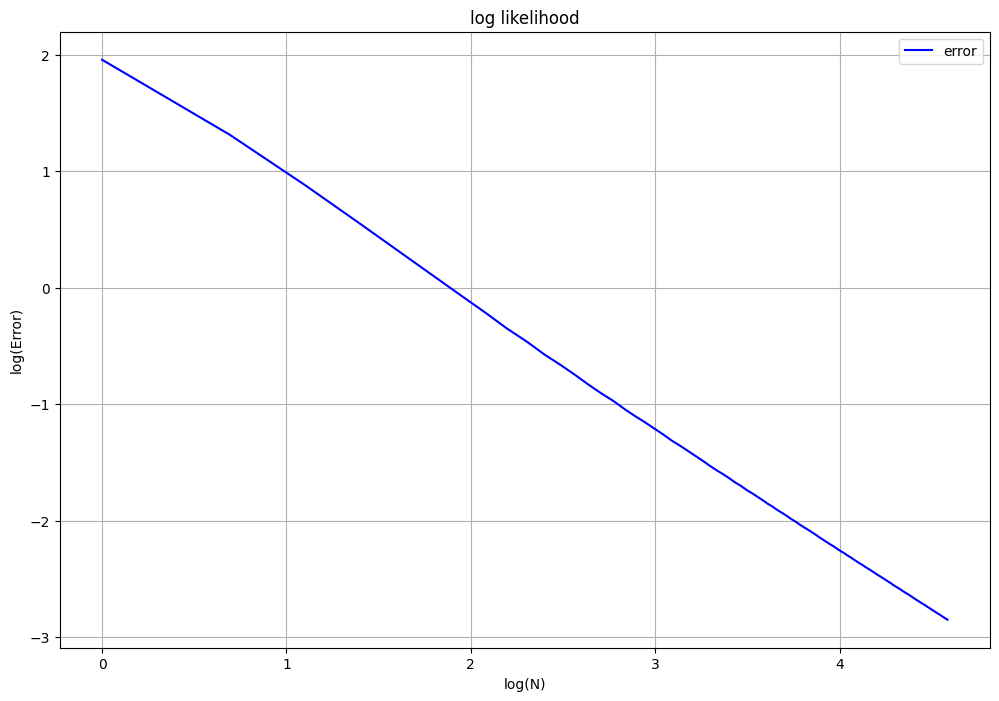

In [53]:
# log likelihood
log_nofelements = []
log_error_list = []
for i in range(0, len(nofelements)-1):
    log_nofelements.append(np.log(nofelements[i]))
    log_error_list.append(np.log(error_list[i]))
    pass
plt.figure(figsize = (12, 8))
plt.plot(log_nofelements, log_error_list, 'b', label='error')
plt.title('log likelihood')
plt.xlabel('log(N)')
plt.ylabel('log(Error)')
plt.grid()
plt.legend()
plt.show()